<a href="https://colab.research.google.com/github/urusy/COVID-19_visualize/blob/main/COVID_19_PositivesByGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install japanize-matplotlib

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import japanize_matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# Google Driveからファイルを読み込み
df_patients = pd.read_csv('/content/drive/MyDrive/data/COVID-19/fukuoka/400009_pref_fukuoka_covid19_patients.csv')

In [34]:
df_patients['公表_年月日'] = pd.to_datetime(df_patients['公表_年月日'])

In [35]:
df_grouped = pd.DataFrame(df_patients.groupby(['年代', '公表_年月日']).count()['No']).rename(columns={'No': '新規陽性数'})
df_grouped

新規陽性数
年代    公表_年月日           
-     2020-08-08      1
      2020-08-10      1
      2020-08-16      1
      2020-12-04      2
      2020-12-06      1
...                 ...
90代以上 2021-07-29      1
      2021-07-30      3
調査中   2021-01-07      7
      2021-01-09      2
      2021-01-21      4

[3615 rows x 1 columns]

In [36]:
generations = ['10歳未満', '10代', '20代', '30代', '40代', '50代', '60代', '70代', '80代', '90代以上', '-']

start_date = '2021-04-01'
end_date = '2021-07-31'

In [37]:
index_days = []

import datetime
start = datetime.datetime(2020, 1, 1, 0, 0, 0)
start

for i in range(1000):
  day = start + datetime.timedelta(days=i)
  
  index_days.append(day)

  if day == datetime.datetime(2021, 7, 31, 0, 0, 0, 0):
    break

In [38]:
import numpy as np

df_index_dates = pd.DataFrame(data=index_days, columns=['公表_年月日'])
# df_index_dates['新規陽性数'] = 0
df_index_dates

,公表_年月日
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05
...,...
573,2021-07-27
574,2021-07-28
575,2021-07-29
576,2021-07-30


In [39]:
df_filled = pd.DataFrame(data=None, index=None, columns=None, copy=False)

for gen in generations:
#   filled = pd.merge(df_index_dates, df_grouped.loc[gen], on='公表_年月日', how='outer').fillna(0)

  df_temp = pd.merge(df_index_dates, df_grouped.loc[gen], on='公表_年月日', how='outer').fillna(0)
  df_temp['年代'] = gen
  df_temp = df_temp.reindex(columns=['年代', '公表_年月日', '新規陽性数'])
  df_temp = df_temp.set_index(['年代', '公表_年月日'])

  df_filled = pd.concat([df_filled, df_temp])

df_filled

新規陽性数
年代    公表_年月日           
10歳未満 2020-01-01    0.0
      2020-01-02    0.0
      2020-01-03    0.0
      2020-01-04    0.0
      2020-01-05    0.0
...                 ...
-     2021-07-27    0.0
      2021-07-28    3.0
      2021-07-29    3.0
      2021-07-30    5.0
      2021-07-31    0.0

[6358 rows x 1 columns]

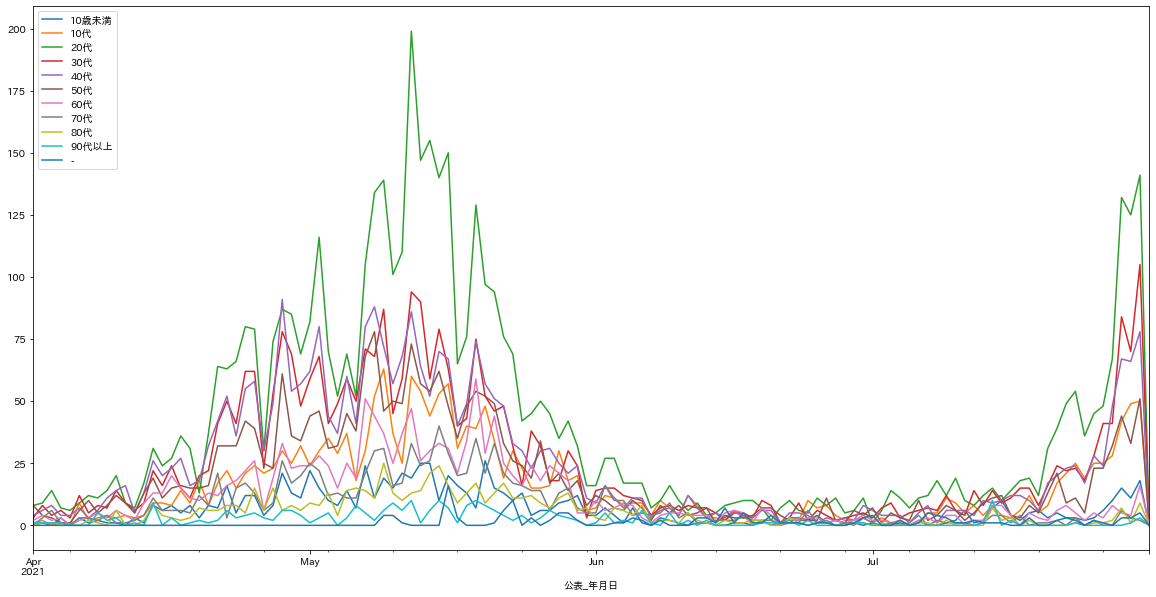

In [40]:
for gen in generations:
  df_filled.loc[gen][start_date:end_date]['新規陽性数'].plot(legend=True, label=gen, figsize=(20, 10))
plt.legend(loc='upper left')
plt.show()

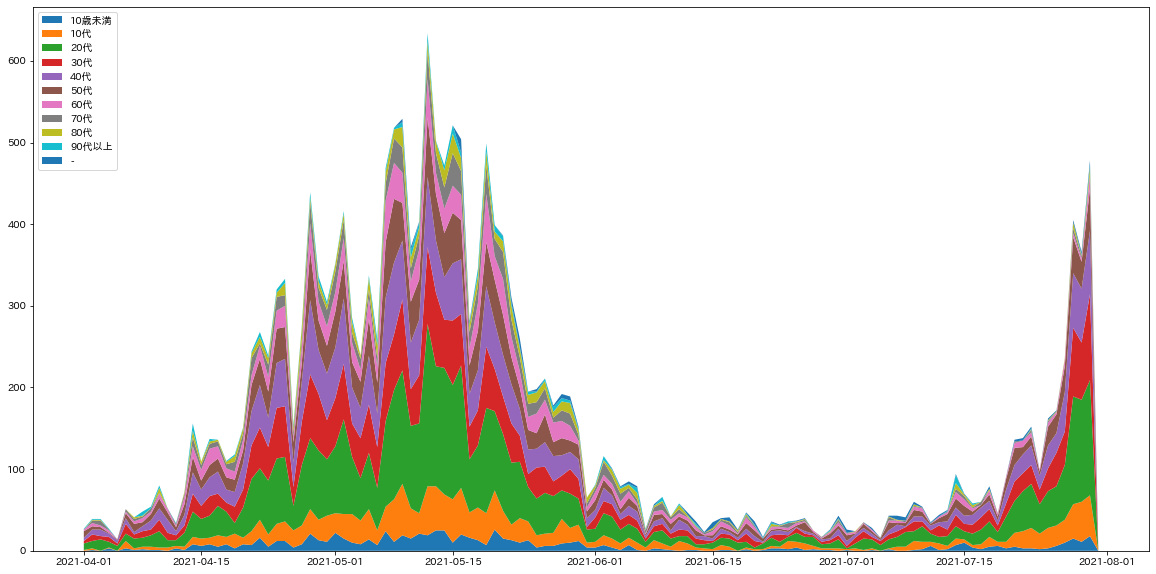

In [43]:
# 改善版

ymd_range = []

for ymd in df_filled.loc[generations[0]][start_date:end_date].index:
  ymd_range.append(ymd)

plot_data = []

for gen in generations:
  plot_data.append(df_filled.loc[gen][start_date:end_date]['新規陽性数'])

plt.figure(figsize=(20, 10))
plt.stackplot(ymd_range, plot_data, labels=generations)
plt.legend(loc='upper left')
plt.show()

In [ ]:
for ymd in 

In [ ]:
# df_filled.to_csv('/content/drive/MyDrive/data/COVID-19/fukuoka/世代別_grouped_filled.csv')

In [ ]:
# for gen in generations:
#   df_filled.loc[gen]['2021-07-01':].to_csv('/content/drive/MyDrive/data/COVID-19/fukuoka/世代別_grouped_' + gen + '_filled.csv')